In [74]:
import pandas as pd
import numpy as np

from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

Remember to document your thoughts and any takeaways as you work through visualizations!

Using your store items data you prepped in lesson 2 exercises:

- Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.
- Validate your splits by plotting X_train and y_train.
- Plot the weekly average & the 7-day moving average. Compare the 2 plots.
- Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.
- Plot a time series decomposition.
- Create a lag plot (day over day).
- Run a lag correlation.

Using your OPS data you prepped in lesson 2 exercises:

- Split your data into train and test using the percent cutoff method.
- Validate your splits by plotting X_train and y_train.
- Plot the weekly average & the 7-day moving average. Compare the 2 plots.
- Group the electricity consumption time series by month of year, to explore annual seasonality.
- Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.
- Plot a time series decomposition. Takeaways?

If time:
- For each store I want to see how many items were sold over a period of time, for each item. Find a way to chart this. Hints: Subplots for the piece with the fewest distinct values (like store), x = time, y = count, color = item. If you have too many distinct items, you may need to plot the top n, while aggregating the others into an 'other' bucket.



In [4]:
df = acquire.combine_dfs()
df = prepare.prep_store_data(df)

In [5]:
df

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue,10.92
2013-01-01 00:00:00+00:00,17,26.0,295813,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,01-Jan,2-Tue,30.16
2013-01-01 00:00:00+00:00,7,32.0,125995,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,01-Jan,2-Tue,308.48
2013-01-01 00:00:00+00:00,18,45.0,314073,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,01-Jan,2-Tue,197.55
2013-01-01 00:00:00+00:00,19,34.0,332333,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,01-Jan,2-Tue,25.16
2013-01-01 00:00:00+00:00,20,29.0,350593,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Usda Produce,20,Plums Black,5.62,204040000000,204040000000,01-Jan,2-Tue,162.98
2013-01-01 00:00:00+00:00,6,32.0,107735,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Sally Hansen,6,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,74170388732,74170388732,01-Jan,2-Tue,221.76
2013-01-01 00:00:00+00:00,21,25.0,368853,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Doctors Best,21,Doctors Best Best Curcumin C3 Complex 1000mg T...,8.09,753950001954,753950001954,01-Jan,2-Tue,202.25
2013-01-01 00:00:00+00:00,22,50.0,387113,3,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Betty Crocker,22,Betty Crocker Twin Pack Real Potatoes Scallope...,7.31,16000288829,16000288829,01-Jan,2-Tue,365.50


In [6]:
by_day = prepare.get_sales_by_day(df)
by_day.head()

,sales_total,diff_with_last_day
sale_date,,
2013-01-01 00:00:00+00:00,73844.01,NaN
2013-01-02 00:00:00+00:00,73570.58,-273.43
2013-01-03 00:00:00+00:00,78169.48,4598.90
2013-01-04 00:00:00+00:00,84467.73,6298.25
2013-01-05 00:00:00+00:00,87621.85,3154.12


##### Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.

In [146]:
df = df.resample("D").mean()

In [147]:
df2 = df.sale_amount.resample('D').sum().reset_index()
X = df2.sale_date
y = df2.sale_amount

In [148]:
tss=TimeSeriesSplit(n_splits=5,max_train_size=None)

In [149]:
for train_index,test_index in tss.split(X):
    print("TRAIN:",train_index,"TEST:",test_index)
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [150]:
train_indices = []
test_indices = []
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    train_indices.append(train_index)
    test_indices.append(test_index)

In [151]:
train_indices

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [152]:
test_indices

[array([306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
        319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331,
        332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344,
        345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357,
        358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370,
        371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383,
        384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396,
        397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409,
        410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422,
        423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435,
        436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448,
        449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461,
        462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474,
        475, 476, 477, 478, 479, 480, 481, 482, 483

In [153]:
# X_train.tail()

##### Validate your splits by plotting X_train and y_train.

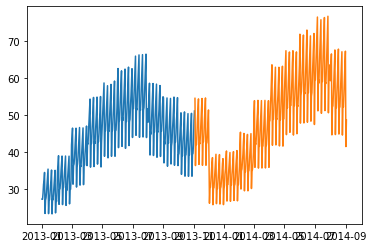

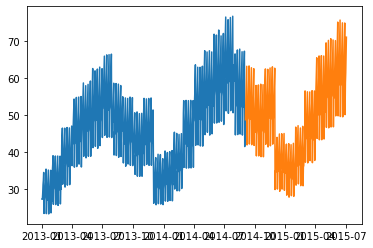

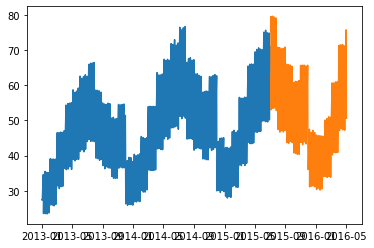

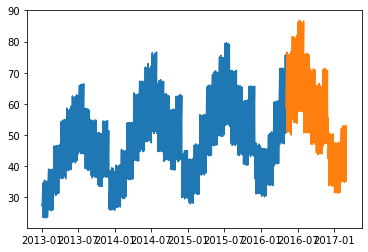

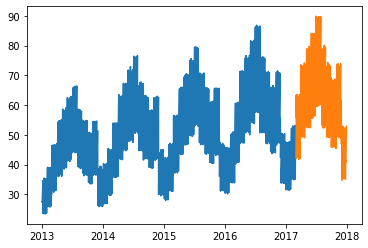

In [154]:
for i in range(0,5):
    plt.plot(X_train[train_indices[i]], y_train[train_indices[i]])
    plt.plot(X[test_indices[i]],y[test_indices[i]])
    plt.show()

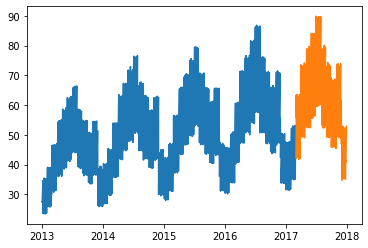

In [155]:
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.show()

##### Plot the weekly average & the 7-day moving average. Compare the 2 plots.

In [156]:
train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1).set_index("sale_date")

In [157]:
train.head()

,sale_amount
sale_date,
2013-01-01 00:00:00+00:00,27.392
2013-01-02 00:00:00+00:00,27.356
2013-01-03 00:00:00+00:00,28.976
2013-01-04 00:00:00+00:00,31.354
2013-01-05 00:00:00+00:00,32.474


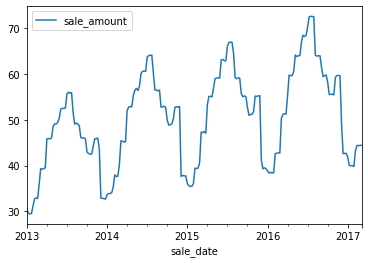

In [158]:
train.resample("W").mean().plot()
plt.show()

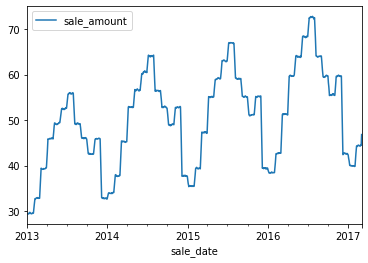

In [159]:
train.rolling(7).mean().plot()
plt.show()

> Both plots follow the same shape

##### Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

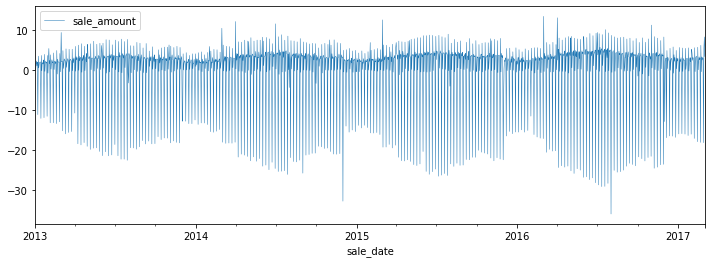

In [162]:
train.diff(periods=1).plot(figsize=(12,4), linewidth=.5)
plt.show()

##### Plot a time series decomposition.

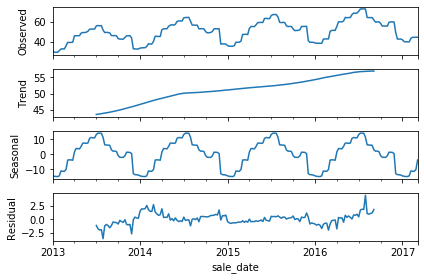

In [163]:
decomp = sm.tsa.seasonal_decompose(train.resample('W').mean(), model='additive')
fig = decomp.plot()
plt.show()

##### Create a lag plot (day over day).

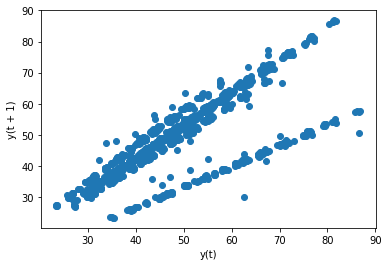

In [164]:
pd.plotting.lag_plot(train.resample("D").mean(), lag=1)
plt.show()

##### Run a lag correlation.

In [165]:
df_corr = pd.concat([train.shift(1),train], axis=1)
df_corr.columns = ["t-1","t+1"]
df_corr.corr()

,t-1,t+1
t-1,1.000000,0.749048
t+1,0.749048,1.000000


> Yesterday can 75% explain tomorrow

##### Using your OPS data you prepped in lesson 2 exercises:

In [180]:
df = acquire.get_OPS()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
Date           4383 non-null object
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


##### Split your data into train and test using the percent cutoff method.

In [181]:
df["date"] = pd.to_datetime(df["Date"])
df = df.set_index("date").resample("D").sum()

In [182]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0
2006-01-04,1457.217,0.0,0.0,0.0
2006-01-05,1477.131,0.0,0.0,0.0


In [189]:
train_size = int(len(df)*.70)
train, test = df[:train_size], df[train_size:]

In [191]:
len(train), len(test)

(3068, 1315)

In [193]:
len(train)/(len(train) + len(test))

0.6999771845767739

##### Validate your splits by plotting X_train and y_train.

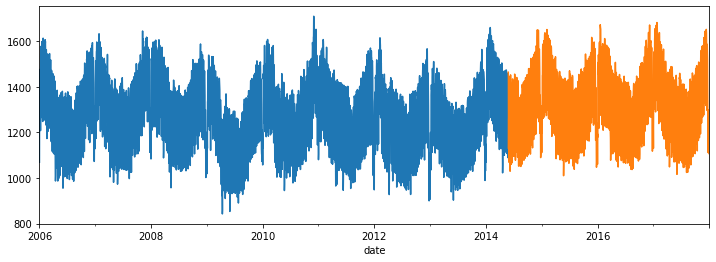

In [197]:
train.Consumption.plot(figsize=(12,4))
test.Consumption.plot(figsize=(12,4))
plt.show()

##### Plot the weekly average & the 7-day moving average. Compare the 2 plots.

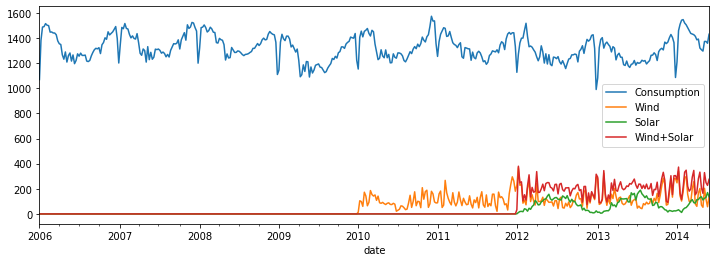

In [201]:
train.resample("W").mean().plot(figsize=(12,4))
plt.show()

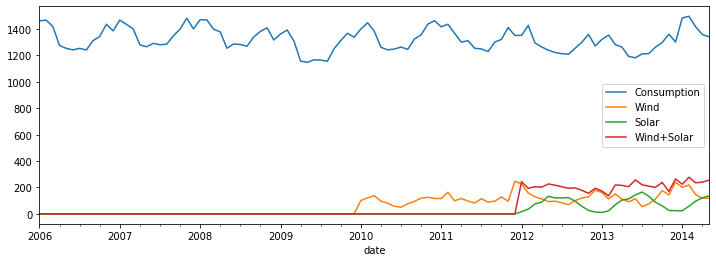

In [203]:
train.resample("MS").mean().plot(figsize=(12,4))
plt.show()

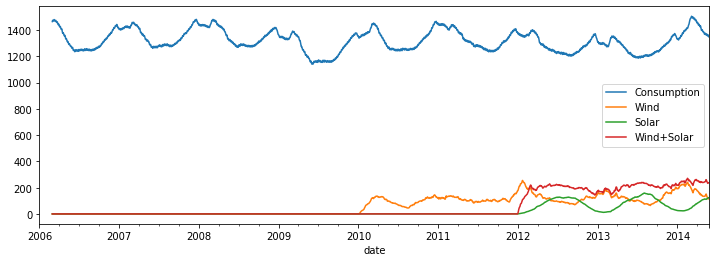

In [205]:
train.rolling(60).mean().plot(figsize=(12,4))
plt.show()

> Losing dips that were shown in the weekly samples. They were a reocurring feature and probably something to retain

##### Group the electricity consumption time series by month of year, to explore annual seasonality.

In [207]:
df["month"] = df.index.month

In [208]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month
date,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1
2006-01-02,1380.521,0.0,0.0,0.0,1
2006-01-03,1442.533,0.0,0.0,0.0,1
2006-01-04,1457.217,0.0,0.0,0.0,1
2006-01-05,1477.131,0.0,0.0,0.0,1


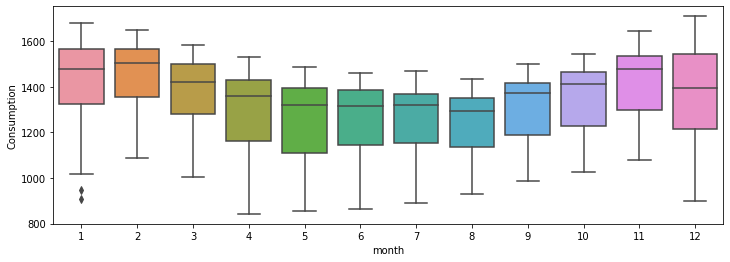

In [211]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x="month", y="Consumption")
plt.show()

##### Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

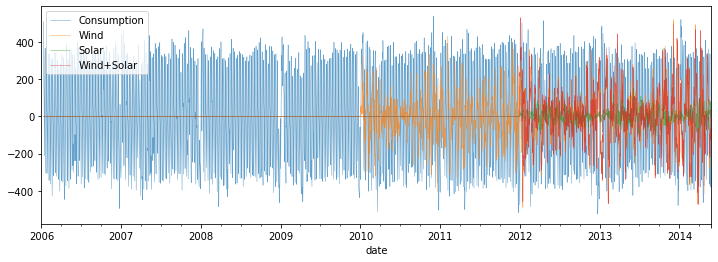

In [214]:
train.diff(periods=10).plot(figsize=(12,4), alpha=.7, linewidth=.5)
plt.show()

##### Plot a time series decomposition. Takeaways?

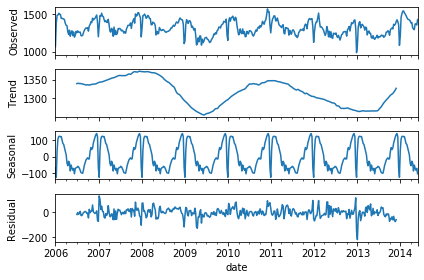

In [222]:
sm.tsa.seasonal_decompose(train.Consumption.resample("W").mean(),model="addictive").plot()
plt.show()

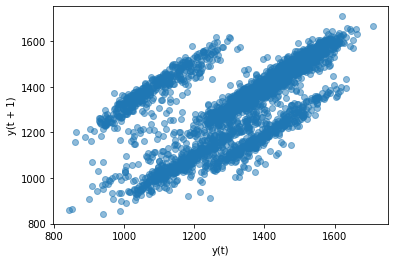

In [225]:
pd.plotting.lag_plot(train.Consumption, lag=1, alpha=.5)
plt.show()

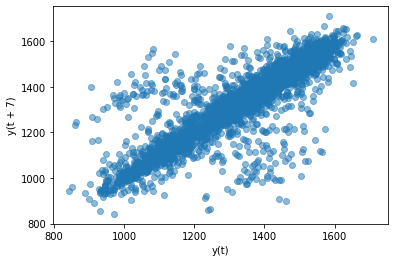

In [226]:
pd.plotting.lag_plot(train.Consumption, lag=7, alpha=.5)
plt.show()

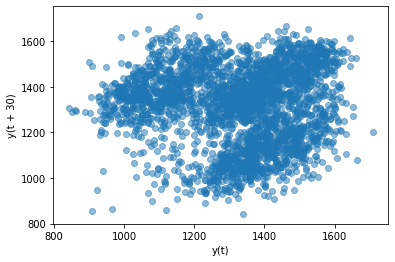

In [227]:
pd.plotting.lag_plot(train.Consumption, lag=30, alpha=.5)
plt.show()

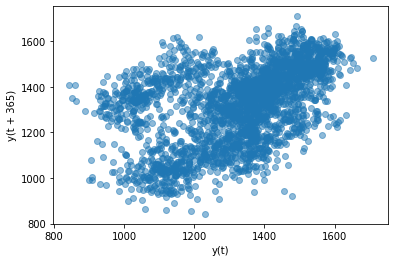

In [228]:
pd.plotting.lag_plot(train.Consumption, lag=365, alpha=.5)
plt.show()